In [124]:
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from tqdm import tqdm
import time

# Datasets

In [125]:
# 指定CSV文件的路径
csv_file_path = './data/Wimbledon_featured_matches.csv'

# 使用pandas的read_csv函数读取CSV文件
df = pd.read_csv(csv_file_path)

matches = df["match_id"].unique()

In [167]:
interested_columns = ['set_no', 'game_no', 'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 
                      'p1_score', 'p2_score', 'server', 'serve_no', 'point_victor', 'p1_points_won', 
                      'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 
                      'p2_winner', 'winner_shot_type', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 
                      'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 
                      'p2_break_pt', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed', 
                      'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph', 
                      'serve_width', 'serve_depth', 'return_depth']

# method 1
# train_columns = ['set_no', 'game_no', 'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 
#                       'server', 'serve_no', 'p1_points_won', 
#                       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 
#                       'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 
#                       'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won', 
#                       'p1_distance_run', 'p2_distance_run', 'rally_count']

# method 2
# train_columns = ['match_id', 'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 
#                       'server', 'serve_no', 'p1_points_won', 
#                       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 
#                       'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 
#                       'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 
#                       'p1_distance_run', 'p2_distance_run', 'rally_count','speed_mph', 'serve_width', 'serve_depth', 'return_depth']

# method 3
# train_columns = ['match_id', 'point_no',  
#                       'server', 'serve_no', 'p1_points_won', 
#                       'p2_points_won', 'p1_ace', 'p2_ace', 'p1_winner', 
#                       'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 
#                       'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 
#                       'p1_distance_run', 'p2_distance_run', 'rally_count','speed_mph', 'serve_width', 'serve_depth', 'return_depth']

# cut 1
# train_columns = ['match_id', 'point_no',  
#                       'server', 'serve_no', 'p1_points_won', 
#                       'p2_points_won', 'p1_ace', 'p2_ace', 'p1_winner', 
#                       'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 
#                       'p1_net_pt', 'p2_net_pt', 
#                       'p1_distance_run', 'p2_distance_run', 'rally_count','speed_mph', 'serve_width', 'serve_depth', 'return_depth']
# cut 2
# train_columns = ['match_id', 'point_no',  
#                       'server', 'serve_no', 'p1_points_won', 
#                       'p2_points_won', 'p1_ace', 'p2_ace', 'p1_winner', 
#                       'p2_winner', 'p1_double_fault', 'p2_double_fault', 
#                       'p1_net_pt', 'p2_net_pt', 
#                       'p1_distance_run', 'p2_distance_run', 'rally_count','speed_mph', 'serve_width', 'serve_depth', 'return_depth']
# cut 3
# train_columns = ['match_id', 'point_no',  
#                       'server', 'serve_no', 'p1_points_won', 
#                       'p2_points_won', 'p1_ace', 'p2_ace',  
#                       'p2_winner', 'p1_double_fault', 'p2_double_fault', 
#                       'p1_net_pt', 'p2_net_pt', 
#                       'p1_distance_run', 'p2_distance_run', 'rally_count','speed_mph', 'serve_width', 'serve_depth', 'return_depth']
# cut 4
train_columns = ['match_id', 'point_no',  
                      'server', 'serve_no', 'p1_points_won', 
                      'p2_points_won', 'p1_ace', 'p2_ace',  
                      'p1_double_fault', 'p2_double_fault', 
                      'p1_net_pt', 'p2_net_pt', 
                      'p1_distance_run', 'p2_distance_run', 'rally_count','speed_mph', 'serve_width', 'serve_depth', 'return_depth']

# cut 5
# train_columns = ['match_id', 'point_no',  
#                       'server', 'serve_no', 'p1_points_won', 
#                       'p2_points_won', 'p1_ace', 'p2_ace',  
#                       'p1_double_fault', 'p2_double_fault', 
#                       'p1_net_pt',
#                       'p1_distance_run', 'p2_distance_run', 'rally_count','speed_mph', 'serve_width', 'serve_depth', 'return_depth']

# cut 1
# train_columns = ['match_id', 'point_no',  
#                       'server', 'serve_no', 
#                       'p2_points_won', 'p1_ace', 'p2_ace', 'p1_winner', 
#                       'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 
#                       'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 
#                       'p1_distance_run', 'p2_distance_run', 'rally_count','speed_mph', 'serve_width', 'serve_depth', 'return_depth']

# train_columns = ['server', 'speed_mph', 'rally_count', 'p1_distance_run', 'serve_width', 'serve_depth', 'p2_distance_run', 'return_depth']
test_columns = ['match_id', 'point_victor']

In [168]:
len(train_columns)

19

In [169]:
wim_df = pd.read_csv("./data/Wimbledon_featured_matches.csv")


shot_type_dic = {"F": 1, "B": 2}
serve_w_dic = {"B": 1, "BC": 2, "BW": 3, "C": 4, "W": 5}
serve_d_dic = {"CTL": 1, "NCTL": 2}
return_d_dic = {"D": 1, "NA": 2, "ND": 3}
wim_df.loc[:, "winner_shot_type"] = wim_df["winner_shot_type"].replace(shot_type_dic)
wim_df.loc[:, "serve_width"] = wim_df["serve_width"].replace(serve_w_dic)
wim_df.loc[:, "serve_depth"] = wim_df["serve_depth"].replace(serve_d_dic)
wim_df.loc[:, "return_depth"] = wim_df["return_depth"].replace(return_d_dic)

for i in range(wim_df.shape[0]):
    if pd.isna(wim_df.loc[i, "return_depth"]):
        wim_df.loc[i, "return_depth"] = 3.0

# 对选择的列进行线性插值
for column in train_columns:
    if column == 'match_id':
        continue
    # 将列转换为数值型，同时将任何非数值数据转换为NaN
    wim_df[column] = pd.to_numeric(wim_df[column], errors='coerce')
    # 现在，对列进行插值
    wim_df[column] = wim_df[column].interpolate()

# wim_df[train_columns].to_csv('processed_file.csv', index=False)  # index=False 可以避免保存索引列

In [170]:
# # 提取感兴趣的列
# x_df = wim_df[train_columns]
# print(x_df.shape)
# y_df = wim_df[test_columuns] - 1
# print(y_df.shape)

In [171]:
# # 划分特征和目标值
# x_array = x_df.values
# y_array = y_df.values

# x = torch.tensor(x_array, dtype=torch.float32)
# y = torch.tensor(y_array, dtype=torch.float32)

# print(x.shape)
# print(y.shape)


In [172]:
"""
划分测试集和验证集
"""

# 传统的方法
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21, shuffle=False)

# 基于 match 的方法
# train_match = matches[:-2]
# train_match = [match for match in matches if match != "2023-wimbledon-1701"]
# train_match = matches
# train_match = matches[:len(matches) // 2]
# train_match = matches[:int(len(matches) / 3 * 2)]
# train_match = matches[:int(len(matches) * 0.5)]
# train_match = matches[:int(len(matches) * 0.6)]
# train_match = matches[:int(len(matches) * 0.7)]
# train_match = matches[:int(len(matches) * 0.8)]
train_match = matches[:int(len(matches) * 0.8)]
data_train = wim_df[wim_df["match_id"].isin(train_match)]  # 使用 isin() 方法筛选符合条件的行
# print(data_train)
x_train = data_train[train_columns]
y_train = data_train[test_columns]
y_train.loc[:, 'point_victor'] = y_train['point_victor'] - 1

# test_match = matches[-2:]
# test_match = ["2023-wimbledon-1701"]
test_match = matches
# test_match = matches[int(len(matches) / 3 * 2):]
# test_match = matches[int(len(matches) * 0.5):]
# test_match = matches[int(len(matches) * 0.6):]
# test_match = matches[int(len(matches) * 0.7):]
# test_match = matches[int(len(matches) * 0.8):]
test_match = matches[int(len(matches) * 0.8):]
data_test = wim_df[wim_df["match_id"].isin(test_match)]
x_test = data_test[train_columns]
y_test = data_test[test_columns]
y_test.loc[:, 'point_victor'] = y_test['point_victor'] - 1

visual_match = ["2023-wimbledon-1701"]
data_visual = wim_df[wim_df["match_id"].isin(visual_match)]
x_visual = data_visual[train_columns]
y_visual = data_visual[test_columns]
y_visual.loc[:, 'point_victor'] = y_visual['point_victor'] - 1

print(len(train_match))
# print(len(test_match))

24


In [173]:
print(matches)
print(matches.shape)
print(train_match)
print(train_match.shape)
print(test_match)
print(test_match.shape)
print(visual_match)

['2023-wimbledon-1301' '2023-wimbledon-1302' '2023-wimbledon-1303'
 '2023-wimbledon-1304' '2023-wimbledon-1305' '2023-wimbledon-1306'
 '2023-wimbledon-1307' '2023-wimbledon-1308' '2023-wimbledon-1309'
 '2023-wimbledon-1310' '2023-wimbledon-1311' '2023-wimbledon-1312'
 '2023-wimbledon-1313' '2023-wimbledon-1314' '2023-wimbledon-1315'
 '2023-wimbledon-1316' '2023-wimbledon-1401' '2023-wimbledon-1402'
 '2023-wimbledon-1403' '2023-wimbledon-1404' '2023-wimbledon-1405'
 '2023-wimbledon-1406' '2023-wimbledon-1407' '2023-wimbledon-1408'
 '2023-wimbledon-1501' '2023-wimbledon-1502' '2023-wimbledon-1503'
 '2023-wimbledon-1504' '2023-wimbledon-1601' '2023-wimbledon-1602'
 '2023-wimbledon-1701']
(31,)
['2023-wimbledon-1301' '2023-wimbledon-1302' '2023-wimbledon-1303'
 '2023-wimbledon-1304' '2023-wimbledon-1305' '2023-wimbledon-1306'
 '2023-wimbledon-1307' '2023-wimbledon-1308' '2023-wimbledon-1309'
 '2023-wimbledon-1310' '2023-wimbledon-1311' '2023-wimbledon-1312'
 '2023-wimbledon-1313' '2023-wim

In [174]:
match_str = """['2023-wimbledon-1406' '2023-wimbledon-1407' '2023-wimbledon-1408' '2023-wimbledon-1501' '2023-wimbledon-1502' '2023-wimbledon-1503' '2023-wimbledon-1504' '2023-wimbledon-1601' '2023-wimbledon-1602' '2023-wimbledon-1701']"""
match_str = match_str.replace(' ', ", ")
match_str.replace('2023-wimbledon-', "")

"['1406', '1407', '1408', '1501', '1502', '1503', '1504', '1601', '1602', '1701']"

In [175]:
# 创建一个 TensorDataset 来组合输入和目标
# train_dataset = TensorDataset(x_train, y_train)
# test_dataset = TensorDataset(x_test, y_test)

# model

In [176]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # 定义LSTM层
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # 定义全连接层
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # 初始化隐状态
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # layers, batches, hidden_size
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # 使用squeeze移除大小为1的维度
        h0 = h0.squeeze(0)
        c0 = c0.squeeze(0)
        
        # 前向传播
        out, _ = self.lstm(x, (h0, c0)) # (batch_size, seq_len, hidden_size), (num_layers, batch_size, hidden_size).

        # 取LSTM最后一步的输出
        out = self.fc(out[:, -1, :])

        return out


In [177]:
# 建立模型
device = 'cuda'
input_size = len(train_columns) - 1
hidden_size = 68
num_layers = 2
output_size = 1
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
model.to(device)
# 损失函数
loss_func = nn.MSELoss()  # 使用均方误差
loss_func.to(device)
# 优化方式
# optim = torch.optim.SGD(model.parameters(), lr=0.02)  # 梯度下降，参数就是权重和偏执
optim = torch.optim.Adam(model.parameters(), lr=0.001)
# 迭代次数
epoch = 1000

100%|███████████████████████████████████████████████████████| 1000/1000 [02:03<00:00,  8.09it/s]

123.57542181015015


Text(0, 0.5, 'Loss')

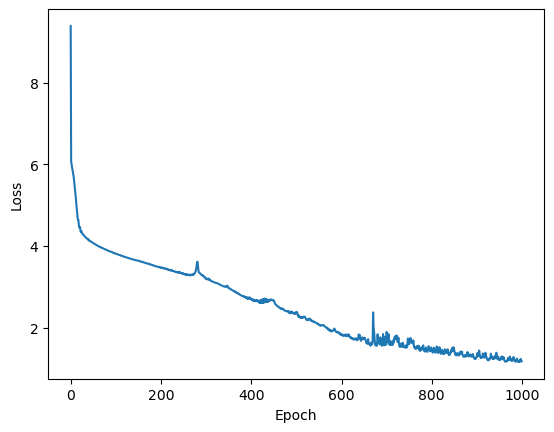

In [178]:
"""
基于 match 的模型训练方法
"""
start_time = time.time() 
train_loss_list = []
test_loss_list = []
x_column = [column for column in train_columns if column != 'match_id']
y_column = [column for column in test_columns if column != 'match_id']
for step in tqdm(range(epoch)):
# 训练模式
    model.train()
    train_loss_epoch = 0
    for match in train_match:
        x_train_match = x_train[x_train['match_id'] == match]
        x_train_match = x_train_match[x_column]
        x_train_match = torch.tensor(x_train_match.values, dtype=torch.float32)
        x_train_match = x_train_match.to(device)
        
        y_train_match = y_train[x_train['match_id'] == match]
        y_train_match = y_train_match[y_column]
        y_train_match = torch.tensor(y_train_match.values, dtype=torch.float32)
        y_train_match = y_train_match.to(device)
        
        # 前向传播
        x_train_3d = x_train_match.unsqueeze(1)
        predict = model.forward(x_train_3d)  # 只有一个 batch
        # 计算损失
        loss_train = loss_func(predict, y_train_match)
        train_loss_epoch += loss_train.detach().cpu().numpy()
        # 梯度清零
        optim.zero_grad()
        # 反向传播
        loss_train.backward()
        # 更新优化参数
        optim.step()
    train_loss_list.append(train_loss_epoch)
    
# 评估模式
    model.eval()
    x_test_match = x_test[x_test['match_id'].isin(test_match)]
    x_test_match = x_test_match[x_column]
    x_test_match = torch.tensor(x_test_match.values, dtype=torch.float32)
    x_test_match = x_test_match.to(device)
    
    y_test_match = y_test[x_test['match_id'].isin(test_match)]
    y_test_match = y_test_match[y_column]
    y_test_match = torch.tensor(y_test_match.values, dtype=torch.float32)
    y_test_match = y_test_match.to(device)
    
    # 前向传播
    x_test_3d = x_test_match.unsqueeze(1)
    predict_eval = model.forward(x_test_3d)
    # 计算损失
    loss_eval = loss_func(predict_eval, y_test_match)
    if step % 1 == 0:
        # plt.scatter(step,loss_eval.detach().numpy())
        test_loss_list.append(loss_eval.detach().cpu().numpy())

end_time = time.time()
print(end_time-start_time)

plt.figure()
plt.plot(range(len(train_loss_list)), train_loss_list, label='Train Loss')
# plt.plot(range(len(test_loss_list)), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
"""
基于 point 的模型训练方法
"""
train_loss_list = []
test_loss_list = []
x_column = [column for column in train_columns if column != 'match_id']
y_column = [column for column in test_columns if column != 'match_id']
for step in tqdm(range(epoch)):
# 训练模式
    model.train()
    train_loss_epoch = 0
    for i in range(len(x_train)):
        x_train_input = x_train.iloc[i].values[1:]  # 提取出一行，去掉最开始的 match_id
        # x_train_input = x_train_input.reshape(1, 1, len(x_train_input))
        # x_train_input = x_train_input[1:]
        x_train_input = x_train_input.astype(np.float32)
        x_train_input = torch.tensor(x_train_input)
        # x_train_input = torch.tensor(x_train_input, dtype=torch.float32)
        x_train_input = x_train_input.to(device)
        
        y_train_input = y_train.iloc[i].values
        y_train_input = y_train_input[1:]
        y_train_input = y_train_input.astype(np.float32)
        y_train_input = torch.tensor(y_train_input)
        # y_train_input = torch.tensor(y_train_input, dtype=torch.float32)
        y_train_input = y_train_input.to(device)
        
        # 前向传播
        # x_train_3d = x_train_input.unsqueeze(1)
        x_train_3d = x_train_input.reshape(1, 1, len(x_train_input))
        predict = model.forward(x_train_3d)  # 只有一个 batch
        
        # 计算损失
        loss_train = loss_func(predict, y_train_input)
        train_loss_epoch += loss_train.detach().cpu().numpy()
        # 梯度清零
        optim.zero_grad()
        # 反向传播
        loss_train.backward()
        # 更新优化参数
        optim.step()
    train_loss_list.append(train_loss_epoch)
    
# 评估模式
    model.eval()
    loss_eval = 0
    for i in range(len(x_test)):
        x_test_input = x_test.iloc[i].values[1:]  # 提取出一行的，去掉最开始的 match_id
        # x_test_input = x_test_input.reshape(1, 1, len(x_test_input))
        x_test_input = x_test_input.astype(np.float32)
        x_test_input = torch.tensor(x_test_input)
        # x_test_input = torch.tensor(x_train_input, dtype=torch.float32)
        x_test_input = x_test_input.to(device)
        
        y_test_input = y_test.iloc[i].values
        y_test_input = y_test_input[1:]
        y_test_input = y_test_input.astype(np.float32)
        y_test_input = torch.tensor(y_test_input)
        # y_test_input = torch.tensor(y_test_input, dtype=torch.float32)
        y_test_input = y_test_input.to(device)
        
        # 前向传播
        x_test_3d = x_test_input.reshape(1, 1, len(x_train_input))
        predict = model.forward(x_test_3d)  # 只有一个 batch
        
        # 计算损失
        loss_eval += loss_func(predict, y_train_input)
    test_loss_list.append(loss_eval.detach().cpu().numpy())
            
    
    # 前向传播
    # x_test_3d = x_test_match.unsqueeze(1)
    # predict_eval = model.forward(x_test_3d)
    # # 计算损失
    # loss_eval = loss_func(predict_eval, y_test_match)
    # if step % 1 == 0:
    #     # plt.scatter(step,loss_eval.detach().numpy())
    #     test_loss_list.append(loss_eval.detach().cpu().numpy())

plt.figure()
plt.plot(range(len(train_loss_list)), train_loss_list, label='Train Loss')
# plt.plot(range(len(test_loss_list)), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [71]:
model_path = "lstm_trained_by_point.pth"
torch.save(model, model_path)

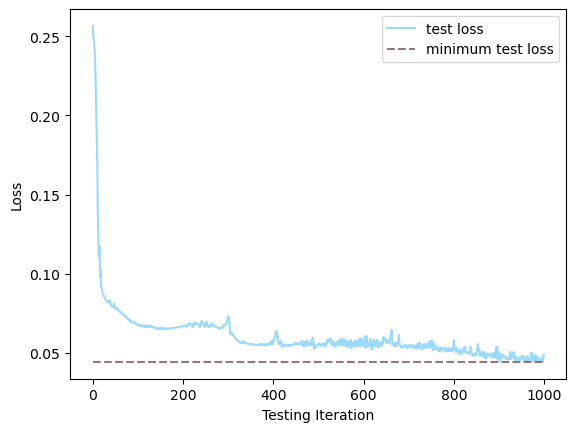

In [32]:
"""
color
"""
# 蓝：9BD9FF
# 绿：9BE9EA
# 紫：C79BF1
# 黄：FBCAB
# 粉：FF9CCD

# 红：FF999A
# 黄：FFE799
# 棕：8F7979

"""
loss figure
"""
min_train_loss_num = min(train_loss_list)
minimum_train_loss = [min_train_loss_num] * 1000
min_train_loss_num = min(test_loss_list)
minimum_test_loss = [min_train_loss_num] * 1000
# plt.plot(range(len(test_loss_list)), train_loss_list, label='train loss', color='#FF999A')
# plt.plot(range(len(test_loss_list)), minimum_test_loss, label='minimum train loss', linestyle = '--', color='#8F7979')

plt.plot(range(len(test_loss_list)), test_loss_list, label='test loss', color='#9BD9FF')
plt.plot(range(len(test_loss_list)), minimum_test_loss, label='minimum test loss', linestyle = '--', color='#8F7979')

plt.legend()
# plt.title('The loss curve for LSTM')
# plt.xlabel('Training Iteration')
plt.xlabel('Testing Iteration')
plt.ylabel('Loss')
# plt.savefig('loss_curve_lstm_train.png', dpi=300)  # dpi设置为300，意味着每英寸300个像素点
plt.savefig('loss_curve_lstm_test.png', dpi=300)  # dpi设置为300，意味着每英寸300个像素点
plt.show()

## 临时不用的代码

In [ ]:
"""
传统的模型训练方法
"""
# plt.figure()
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

# for step in range(epoch):
# # 训练模式
#     model.train()
#     # 前向传播
#     x_train_3d = x_train.unsqueeze(1)
#     predict = model.forward(x_train_3d)  # 只有一个 batch
#     # 计算损失
#     loss_train = loss_func(predict, y_train)
#     # 梯度清零
#     optim.zero_grad()
#     # 反向传播
#     loss_train.backward()
#     # 更新优化参数
#     optim.step()
    
# # 评估模式
#     model.eval()
#     # 前向传播
#     x_test_3d = x_test.unsqueeze(1)
#     predict_eval = model.forward(x_test_3d)
#     # 计算损失
#     loss_eval = loss_func(predict_eval, y_test)
#     if step % 1 == 0:
#         plt.scatter(step,loss_eval.detach().numpy())

In [34]:
"""
带 batchsize 的训练
"""

# # 设置超参数
# epoch = 1
# batch_size = 256
# # 用于存储所有预测值和真实值的列表
# all_predictions = []
# all_targets = []

# for step in range(epoch):
#     # 训练模式
#     model.train()
    
#     # 定义总训练损失
#     total_train_loss = 0.0
    
#     # 获取训练数据的 DataLoader
#     train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    
#     for inputs, targets in train_loader:
#         inputs = inputs.unsqueeze(1)
#         # print(inputs.shape)
#         # 前向传播
#         predict = model(inputs)
#         # 计算损失
#         loss_train = loss_func(predict, targets)
#         total_train_loss += loss_train.item() * inputs.size(0)  # 乘以批次大小
        
#         # 梯度清零
#         optim.zero_grad()
#         # 反向传播
#         loss_train.backward()
#         # 更新优化参数
#         optim.step()
    
#     # 计算平均训练损失
#     avg_train_loss = total_train_loss / len(train_loader.dataset)
    
#     # 评估模式
#     model.eval()
    
#     # 定义总评估损失
#     total_eval_loss = 0.0
    
#     # 获取测试数据的 DataLoader
#     test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)
    
#     with torch.no_grad():  # 在评估模式下不需要计算梯度
#         for inputs, targets in test_loader:
#             inputs = inputs.unsqueeze(1)
#             # 前向传播
#             predict_eval = model(inputs)
#             # 计算损失
#             loss_eval = loss_func(predict_eval, targets)
#             total_eval_loss += loss_eval.item() * inputs.size(0)  # 乘以批次大小
#             # 将预测值和真实值添加到列表中
#             all_predictions.append(predict_eval.numpy())
#             all_targets.append(targets.numpy())
#     # 计算平均评估损失
#     avg_eval_loss = total_eval_loss / len(test_loader.dataset)
    
#     # 打印每个 epoch 的训练和评估损失
#     print(f"Epoch [{step+1}/{epoch}], Train Loss: {avg_train_loss:.4f}, Eval Loss: {avg_eval_loss:.4f}")
    
#     # 每 4 个 epoch 绘制一次评估损失
#     if step % 1 == 0:
#         plt.scatter(step, avg_eval_loss)

# # 将预测值和真实值列表转换为 NumPy 数组
# all_predictions = np.concatenate(all_predictions, axis=0)
# all_targets = np.concatenate(all_targets, axis=0)

# # 绘制预测值和真实值的图像
# plt.figure()
# plt.plot(all_predictions, label='Predictions')
# plt.plot(all_targets, label='Targets')
# plt.legend()
# plt.show()

'\n带 batchsize 的训练\n'

# Evaluation

In [166]:
"""
基于 point 训练的模型，在测试集上的总正确率
"""
model.eval()
right_num = 0
for i in range(len(x_test)):
    x_test_input = x_test.iloc[i].values[1:]  # 提取出一行的，去掉最开始的 match_id
    # x_test_input = x_test_input.reshape(1, 1, len(x_test_input))
    x_test_input = x_test_input.astype(np.float32)
    x_test_input = torch.tensor(x_test_input)
    # x_test_input = torch.tensor(x_train_input, dtype=torch.float32)
    x_test_input = x_test_input.to(device)
    
    y_test_input = y_test.iloc[i].values
    y_test_input = y_test_input[1:]
    y_test_input = y_test_input.astype(np.float32)
    y_test_input = torch.tensor(y_test_input)
    # y_test_input = torch.tensor(y_test_input, dtype=torch.float32)
    y_test_input = y_test_input.to(device)
    
    # 前向传播
    x_test_3d = x_test_input.reshape(1, 1, len(x_train_input))
    predict = model.forward(x_test_3d)  # 只有一个 batch

    predict_value = predict[0][0].item()
    gt_values = y_test_input.item()

    if predict_value >= 0.5 and gt_values == 1.0:
        right_num += 1
    if predict_value < 0.5 and gt_values == 0.0:
        right_num += 1
print(right_num / len(x_test))

In [164]:
"""
基于 match 训练的模型，在测试集上的总正确率
"""
right_num = 0
for i in range(len(predict_eval)):
    if predict_eval[i] >= 0.5 and y_test_match[i] == 1:
        right_num += 1
    if predict_eval[i] < 0.5 and y_test_match[i] == 0:
        right_num += 1
print(right_num/len(predict_eval))
# print(predict_eval)

0.844311377245509


In [165]:
"""
基于 match 训练的模型，训练和测试的最小 loss
"""
print(min(train_loss_list))
print(min(test_loss_list))

0.5715401256456971
0.086173244


In [156]:
"""
基于 match 训练的模型，在最后10场 match 上的正确率
"""
model.eval()
match_acc_all = []
last_match_prediction = []
for match in test_match:
    last_match_prediction = []
    x_test_match = x_test[x_test['match_id'] == match]
    x_test_match = x_test_match[x_column]
    x_test_match = torch.tensor(x_test_match.values, dtype=torch.float32)
    x_test_match = x_test_match.to(device)
    
    y_test_match = y_test[x_test['match_id'] == match]
    y_test_match = y_test_match[y_column]
    y_test_match = torch.tensor(y_test_match.values, dtype=torch.float32)
    y_test_match = y_test_match.to(device)
    # 前向传播
    x_test_3d = x_test_match.unsqueeze(1)
    predict_eval = model.forward(x_test_3d)
    # 计算损失
    match_acc = 0
    match_right = 0
    for i in range(len(predict_eval)):
        predict_point = predict_eval[i][0].item()
        gt_point = y_test_match[i].item()
        # print(predict_eval.shape)
        # print(predict_point, gt_point)
        if predict_point >= 0.5 and gt_point == 1.0:
            match_right += 1
        if predict_point < 0.5 and gt_point == 0.0:
            match_right += 1
        last_match_prediction.append(predict_point)
    match_acc = match_right/len(predict_eval)
    match_acc_all.append(match_acc)
print(match_acc_all)
print(last_match_prediction)

[0.9206349206349206, 0.9399293286219081, 0.9067357512953368, 0.880184331797235, 0.8930817610062893, 0.8811881188118812, 0.844311377245509]
[0.9240762591362, 0.181154265999794, 0.03311549872159958, 0.9436172246932983, -0.0612839013338089, 0.9046163558959961, 0.8808015584945679, 1.269547939300537, 0.6966980695724487, 0.9071765542030334, 1.0115035772323608, 0.9419215321540833, 1.3843843936920166, 0.0536966472864151, -0.016662314534187317, 1.1948997974395752, 1.262380599975586, 1.1286433935165405, 0.7698919773101807, 1.17381751537323, 0.7129872441291809, 0.9567956924438477, 1.0168370008468628, -0.033760473132133484, 0.9407361745834351, -0.12167291343212128, -0.03506256639957428, -0.05430641770362854, 0.6936253309249878, 0.9910470247268677, 0.9358737468719482, 0.9814214110374451, 0.06383515894412994, 1.0837583541870117, 0.9934568405151367, -0.026667729020118713, -0.07169738411903381, 0.9990755319595337, 0.9401043653488159, 0.17455993592739105, 0.33808624744415283, 1.222240924835205, 0.96715

In [58]:
# 将列表转换为pandas的DataFrame
df = pd.DataFrame(last_match_prediction, columns=['Data'])

# 将DataFrame保存到Excel文件中
df.to_excel('last_match_prediction.xlsx', index=False)


In [53]:
"""
绘制 Comparison of stochastic probability model and momentum-based model 的数据
"""
lstm_match_acc = [0.9641025641025641, 0.9335347432024169, 0.966789667896679, 0.9365079365079365, 0.9611307420494699, 0.9326424870466321, 0.9354838709677419, 0.9119496855345912, 0.9504950495049505, 0.9251497005988024]
custom_match_acc = [0.6666666666666666, 0.7341389728096677, 0.7601476014760148, 0.708994708994709, 0.6819787985865724, 0.6580310880829016, 0.663594470046083, 0.610062893081761, 0.6831683168316832, 0.6107784431137725]
print(sum(custom_match_acc) / len(custom_match_acc))
print(sum(lstm_match_acc) / len(lstm_match_acc))

0.6777561959689831
0.9247208470464875


In [81]:
print(x_test_3d.shape)
print(predict_eval.shape)

torch.Size([2374, 1, 28])
torch.Size([2374, 1])


In [52]:
"""
通过梯度归因（gradient attribution），计算输入对输出的贡献
"""
from captum.attr import IntegratedGradients
from captum.attr import visualization as viz

# 假设你已经定义了LSTMModel并且实例化了模型
# model = LSTMModel(input_size=10, hidden_size=50, num_layers=1, output_size=1)
model.train()
match = "2023-wimbledon-1701"
x_test_match = x_test[x_test['match_id'] == match]
x_test_match = x_test_match[x_column]
x_test_match = torch.tensor(x_test_match.values, dtype=torch.float32)
x_test_match = x_test_match.to(device)

# y_test_match = y_test[x_test['match_id'] == match]
# y_test_match = y_test_match[y_column]
# y_test_match = torch.tensor(y_test_match.values, dtype=torch.float32)
# y_test_match = y_test_match.to(device)
# 前向传播
x_test_3d = x_test_match.unsqueeze(1)
predict_eval = model.forward(x_test_3d)

# print(predict_eval.cpu().numpy())
# print(predict_eval.shape(1, len(predict_eval)))

print(predict_eval.transpose(1, 0).tolist())

# 将列表转换为pandas的DataFrame
df = pd.DataFrame(last_match_prediction, columns=['Data'])

# 将DataFrame保存到Excel文件中
df.to_excel('last_match_prediction.xlsx', index=False)

[[1.0303971767425537, -0.005903000012040138, -0.00917137786746025, 1.008366584777832, -0.001596527174115181, 0.9752737283706665, 1.0544650554656982, -0.05881092697381973, 1.0095703601837158, 1.0230742692947388, 1.0318267345428467, 1.0650248527526855, 0.947513222694397, 0.11572050303220749, -0.004104803316295147, 1.330151081085205, 1.027998685836792, -0.038185663521289825, 0.9335042834281921, 0.8432217836380005, 0.9662261009216309, 0.9892261028289795, 1.0375515222549438, -0.02654946781694889, 1.234744668006897, 0.9773666858673096, 0.42429405450820923, -0.0026204008609056473, 1.0477001667022705, 0.8474248051643372, 0.9636441469192505, 1.0164216756820679, -0.027849769219756126, 0.9842653274536133, 1.0263150930404663, -0.02712770737707615, -0.013168699108064175, 1.0126811265945435, 1.01450514793396, 0.06952257454395294, -0.018321439623832703, 0.8872114419937134, 0.9516017436981201, 0.9871244430541992, 1.0219640731811523, 1.1099369525909424, 0.9994621276855469, 0.7044956684112549, -0.036530

In [45]:
"""
可视化最后那一场比赛的预测结果
"""

# print(x_visual)
# x_visual_match = x_visual[x_visual['match_id'] == match]
x_visual_match = x_visual[x_column]
# print(x_visual_match)
x_visual_match = torch.tensor(x_visual_match.values, dtype=torch.float32)
x_visual_match = x_visual_match.to(device)

# y_visual_match = y_visual[y_visual['match_id'] == match]
y_visual_match = y_visual[y_column]
y_visual_match = torch.tensor(y_visual_match.values, dtype=torch.float32)
y_visual_match = y_visual_match.to(device)

# 前向传播
x_visual_3d = x_visual_match.unsqueeze(1)
predict = model.forward(x_visual_3d)  # 只有一个 batch

visual_predict = predict[:10]
visual_predict = visual_predict - min(visual_predict)
print(visual_predict)
print(visual_predict.reshape(10))
print(max(visual_predict) - visual_predict.reshape(10))


tensor([[1.0498],
        [0.1978],
        [0.0388],
        [1.0303],
        [0.0000],
        [0.9833],
        [1.0618],
        [0.0630],
        [1.0338],
        [1.0857]], device='cuda:0', grad_fn=<SubBackward0>)
tensor([1.0498, 0.1978, 0.0388, 1.0303, 0.0000, 0.9833, 1.0618, 0.0630, 1.0338,
        1.0857], device='cuda:0', grad_fn=<ViewBackward0>)
tensor([0.0359, 0.8879, 1.0469, 0.0554, 1.0857, 0.1024, 0.0239, 1.0227, 0.0519,
        0.0000], device='cuda:0', grad_fn=<SubBackward0>)


In [77]:
# 绘制预测值和真实值的图像
# plt.figure()
# plt.scatter(range(len(x_test)), x_test, label='Predictions')
# plt.scatter(range(len(predict_eval)), predict_eval, label='Targets')
# plt.legend()
# plt.show()
import matplotlib.pyplot as plt


# 将张量转换为 numpy 数组或者 Python 标量
y_test_array = y_test.numpy() if isinstance(y_test, torch.Tensor) else y_test
predict_eval_array = predict_eval.detach().numpy() if isinstance(predict_eval, torch.Tensor) else predict_eval

print(y_test_array.shape)
print(predict_eval_array.shape)

print(len(y_test_array))
print(len(predict_eval_array))

right_num = 0
for i in range(len(predict_eval_array)):
    if predict_eval_array[i] >= 0.5 and y_test_array[i] == 1:
        right_num += 1
    if predict_eval_array[i] < 0.5 and y_test_array[i] == 0:
        right_num += 1
print(right_num / len(y_test_array))
        
        

# # 绘制预测值和真实值的图像
# plt.figure()
# plt.scatter(range(len(y_test_array)), y_test_array, label='Predictions')
# plt.scatter(range(len(predict_eval_array)), predict_eval_array, label='Targets')
# plt.legend()
# plt.show()

(2186, 1)
(2186, 1)
2186
2186
0.9080512351326624


In [57]:
"""
根据输入数据的梯度，判断输入对输出的影响程度
"""
# 计算输入向量中每个维度的梯度
# x_test_3d = x_test.unsqueeze(1)
# input_data = x_test_3d
model.train()
# x_train_3d = x_train.unsqueeze(1)
input_data = x_train_3d
input_data.requires_grad = True
predictions = model(input_data)
loss = predictions.sum()
loss.backward()

# 获取梯度
gradients = input_data.grad[0][0]

# 计算梯度的绝对值并归一化
abs_gradients = torch.abs(gradients)
normalized_gradients = abs_gradients / torch.sum(abs_gradients)
normalized_gradients_sorted = sorted(normalized_gradients, reverse=True)
# 找到对输出贡献最大的维度
max_contributing_dimension = torch.argmax(normalized_gradients).item()

print(abs_gradients)
print(normalized_gradients)
print("输入向量中对LSTM输出贡献最大的维度是：", max_contributing_dimension)
print(len(gradients))
# print(normalized_gradients_sorted[:10])

gradient_sum = 0
for i in range(8):
    gradient_sum += normalized_gradients_sorted[i].item()
    for j in range(len(normalized_gradients)):
        if normalized_gradients[j].item() == normalized_gradients_sorted[i].item():
            # print(j)
            print(train_columns[j + 1] + " " + str(normalized_gradients[j].item()))
        
print(gradient_sum)
print(1 - gradient_sum)

tensor([0.0215, 0.0185, 0.0196, 0.0005, 0.0330, 0.0249, 0.0185, 0.2607, 0.2253,
        0.0521, 0.0374, 0.3061, 0.3489, 0.0157, 0.1960, 0.0124, 0.0119, 0.0238,
        0.0054, 0.1226, 0.0156, 0.0710], device='cuda:0')
tensor([0.0117, 0.0100, 0.0107, 0.0003, 0.0179, 0.0135, 0.0101, 0.1415, 0.1223,
        0.0283, 0.0203, 0.1662, 0.1894, 0.0085, 0.1064, 0.0068, 0.0065, 0.0129,
        0.0029, 0.0666, 0.0085, 0.0386], device='cuda:0')
输入向量中对LSTM输出贡献最大的维度是： 12
22
p2_unf_err 0.18943701684474945
p1_unf_err 0.1662312000989914
p1_winner 0.14153935015201569
p2_winner 0.12231723219156265
p2_net_pt 0.10643469542264938
serve_width 0.06658735126256943
return_depth 0.0385674349963665
p1_double_fault 0.028301609680056572
0.8594158906489611
0.14058410935103893


In [45]:
import torch
import torch.nn as nn
import numpy as np

# 创建一个简单的LSTM模型
input_dim = 10
output_dim = 1
sequence_length = 1

# 定义LSTM模型
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[-1])
        return output

# 创建模型实例
model = LSTMModel(input_dim, output_dim, output_dim)

# 定义一个输入向量
input_vector = np.random.rand(input_dim)

# 将输入向量转换为PyTorch张量
input_data = torch.Tensor(input_vector).view(sequence_length, 1, input_dim)

# 获取LSTM模型的输出
output = model(input_data)

# 计算输入向量中每个维度的梯度
input_data.requires_grad = True
predictions = model(input_data)
loss = predictions.sum()
loss.backward()

# 获取梯度
gradients = input_data.grad[0][0]

# 计算梯度的绝对值并归一化
abs_gradients = torch.abs(gradients)
normalized_gradients = abs_gradients / torch.sum(abs_gradients)

# 找到对输出贡献最大的维度
max_contributing_dimension = torch.argmax(normalized_gradients).item()
print(normalized_gradients)
print("输入向量中对LSTM输出贡献最大的维度是：", max_contributing_dimension)


tensor([0.0434, 0.1917, 0.0666, 0.1538, 0.0928, 0.1199, 0.0148, 0.1505, 0.0193,
        0.1472])
输入向量中对LSTM输出贡献最大的维度是： 1


In [155]:
# 保存数组到文件
np.savetxt('predict_point.txt', predict_eval_array)

0.9501372369624885
2186


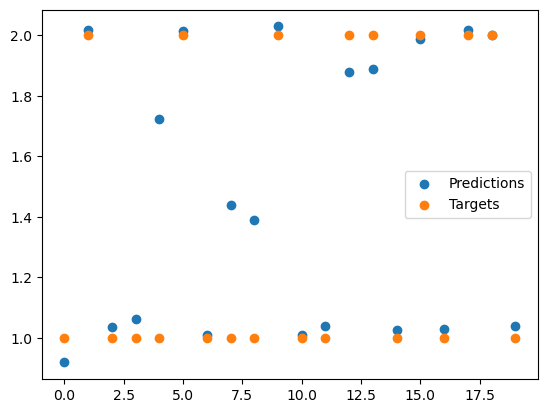

In [138]:
# 将预测值和真实值列表转换为 NumPy 数组
# all_predictions = np.concatenate(all_predictions, axis=0)
# all_targets = np.concatenate(all_targets, axis=0)
# all_predictions = all_predictions[:100]
# all_predictions = all_predictions[]

# for i in range(len(all_predictions)):
#     if all_predictions[i] >= 1.5:
#         all_predictions[i] = 2
#     else:
#         all_predictions[i] = 1
        
# all_targets = all_targets[:100]
# print(all_predictions.shape)
# all_targets = all_targets[:100]

total = len(all_predictions)
right = 0
for i in range(len(all_predictions)):
    if all_predictions[i] >= 1.5:
        if all_targets[i] == 2:
            right += 1
    else:
        if all_targets[i] == 1:
            right += 1

print(right / total)
print(total)
# 绘制预测值和真实值的图像
plt.figure()
plt.scatter(range(len(all_predictions[-20:])), all_predictions[-20:], label='Predictions')
plt.scatter(range(len(all_targets[-20:])), all_targets[-20:], label='Targets')
plt.legend()
plt.show()


# Figure Code

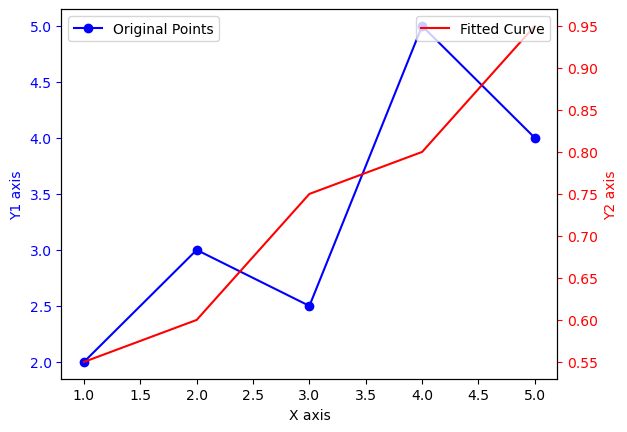

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# 假设我们有的五个点
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 2.5, 5, 4])

# 使用多项式拟合这五个点
coeffs = np.polyfit(x, y, 4)  # 4次多项式拟合
polynomial = Polynomial(coeffs[::-1])

# 创建一个新的x值数组，用于绘制拟合曲线
x_fit = np.linspace(x.min(), x.max(), )
y_fit = polynomial(x_fit)
y_fit = [0.55, 0.6, 0.75, 0.8, 0.95]

# 创建图表和第一个坐标轴
fig, ax1 = plt.subplots()

# 在第一个坐标轴上绘制折线图
ax1.plot(x, y, 'o-', color='blue', label='Original Points')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y1 axis', color='blue')
ax1.tick_params('y', colors='blue')

# 创建第二个坐标轴，共享X轴
ax2 = ax1.twinx()

# 在第二个坐标轴上绘制拟合曲线
ax2.plot(x_fit, y_fit, '-', color='red', label='Fitted Curve')
ax2.set_ylabel('Y2 axis', color='red')
ax2.tick_params('y', colors='red')

# 添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图表
plt.show()


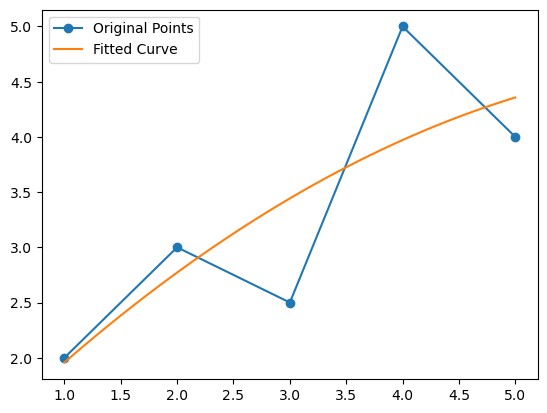

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# 假设我们有的五个点
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 2.5, 5, 4])

# 使用多项式拟合这五个点
coeffs = np.polyfit(x, y, 2)  # 4次多项式拟合
polynomial = Polynomial(coeffs[::-1])

# 创建一个新的x值数组，用于绘制拟合曲线
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = polynomial(x_fit)

# 绘制折线图
plt.plot(x, y, 'o-', label='Original Points')

# 绘制拟合曲线
plt.plot(x_fit, y_fit, '-', label='Fitted Curve')

# 添加图例
plt.legend()

# 显示图表
plt.show()


# Code for WTT

## Datasets for WTT

In [27]:
# 指定CSV文件的路径
csv_file_path_wtt = './data/WTT_2024_extand.csv'

# 使用pandas的read_csv函数读取CSV文件
df_wtt = pd.read_csv(csv_file_path_wtt)

# # 找到重复行
# duplicate_rows = df_wtt[df_wtt.duplicated()]

# # 合并重复行
# df_wtt = df_wtt.groupby(df_wtt.columns.tolist(), as_index=False).size()

# # # 将合并后的 DataFrame 写入新的 Excel 文件
# # merged_df.to_excel('merged_output.xlsx', index=False)
# print(df_wtt.shape)

In [29]:
matches = df_wtt['match_id']

train_match_data = df_wtt[:int(len(matches) * 0.8)]
test_match_data = df_wtt[int(len(matches) * 0.8):]

print(matches.shape)
print(type(train_match_data))
print(train_match_data.shape)
print(test_match_data.shape)

train_field = ['g_1', 'g_2', 'g_3', 'g_4', 'g_5']
test_field = ['y_1', 'y_2', 'y_3', 'y_4', 'y_5']

"""
测算单场 match 被记录的次数
"""
# matches_unique = {}
# for match in matches:
#     if match not in matches_unique.keys():
#         matches_unique[match] = 0
#     else:
#         matches_unique[match] = matches_unique[match] + 1
# for match in matches_unique.keys():
#     print(match + ":" + str(matches_unique[match]))

(606,)
<class 'pandas.core.frame.DataFrame'>
(545, 12)
(61, 12)


'\n测算单场 match 被记录的次数\n'

In [30]:
"""
根据match_id 生成一组用于训练、测试的数据。
"""
def get_train_match_data(match_id):
    # match_id = 0
    x_list = []
    y_list = []
    train_data_1 = train_match_data.iloc[match_id]
    train_data_2 = train_match_data.iloc[match_id + 1]
    x_1 = [train_data_1['g_1'], train_data_2['g_1'], 0, 0, 0, 0, 0, 0]
    y_1 = [train_data_1['y_2']]
    x_2 = [train_data_1['g_1'], train_data_2['g_1'], train_data_1['g_2'], train_data_2['g_2'], 0, 0, 0, 0]
    y_2 = [train_data_1['y_3']]
    x_3 = [train_data_1['g_1'], train_data_2['g_1'], train_data_1['g_2'], train_data_2['g_2'], train_data_1['g_3'], train_data_2['g_3'], 0, 0]
    y_3 = [train_data_1['y_4']]
    x_4 = [train_data_1['g_1'], train_data_2['g_1'], train_data_1['g_2'], train_data_2['g_2'], train_data_1['g_3'], train_data_2['g_3'], train_data_1['g_4'], train_data_2['g_4']]
    y_4 = [train_data_1['y_5']]
    # print(x_1)
    # print(y_1)
    # print(x_2)
    # print(y_2)
    # print(x_3)
    # print(y_3)
    # print(x_4)
    # print(y_4)
    x_list.append(x_1)
    x_list.append(x_2)
    x_list.append(x_3)
    x_list.append(x_4)
    y_list.append(y_1)
    y_list.append(y_2)
    y_list.append(y_3)
    y_list.append(y_4)
    return x_list, y_list

# x_list, y_list = get_train_match_data(0)
# print(x_list)
# print(y_list)

## Model and Train for WTT

In [31]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # 定义LSTM层
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # 定义全连接层
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # 初始化隐状态
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # 使用squeeze移除大小为1的维度
        h0 = h0.squeeze(0)
        c0 = c0.squeeze(0)
        
        # 前向传播
        out, _ = self.lstm(x, (h0, c0))

        # 取LSTM最后一步的输出
        out = self.fc(out[:, -1, :])

        return out

In [32]:
# 建立模型
device = 'cuda'
input_size = 8
hidden_size = 68
num_layers = 2
output_size = 1
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
model.to(device)
# 损失函数
loss_func = nn.MSELoss()  # 使用均方误差
loss_func.to(device)
# 优化方式
# optim = torch.optim.SGD(model.parameters(), lr=0.02)  # 梯度下降，参数就是权重和偏执
optim = torch.optim.Adam(model.parameters(), lr=0.001)
# 迭代次数
epoch = 1000

In [33]:
"""
基于 match 的模型训练方法
"""
train_loss_list = []
test_loss_list = []
for step in tqdm(range(epoch)):
# 训练模式
    model.train()
    train_loss_epoch = 0
    for i in range(0, len(train_match_data), 2):
        x, y = get_train_match_data(i)
        input_x = torch.tensor(x).float()
        input_x = input_x.to(device)
        input_y = torch.tensor(y).float()
        input_y = input_y.to(device)
        input_x_3d = input_x.unsqueeze(1)
        
        predict = model.forward(input_x_3d)  # 只有一个 batch
        loss_train = loss_func(predict, input_y)
        train_loss_epoch += loss_train.detach().cpu().numpy()
        optim.zero_grad()
        loss_train.backward()
        optim.step()
    train_loss_list.append(train_loss_epoch)
        
# 评估模式
    model.eval()
    test_loss_epoch = 0
    for i in range(0, len(test_match_data), 2):
        x, y = get_train_match_data(i)
        input_x = torch.tensor(x).float()
        input_x = input_x.to(device)
        input_y = torch.tensor(y).float()
        input_y = input_y.to(device)
        input_x_3d = input_x.unsqueeze(1)
        
        predict_eval = model.forward(input_x_3d)
        # 计算损失
        loss_eval = loss_func(predict_eval, input_y)
        test_loss_epoch += loss_eval
    if step % 1 == 0:
        test_loss_list.append(test_loss_epoch.detach().cpu().numpy())

plt.figure()
plt.plot(range(len(train_loss_list)), train_loss_list, label='Train Loss')
# plt.plot(range(len(test_loss_list)), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
            
#     for match in train_match:
#         x_train_match = x_train[x_train['match_id'] == match]
#         x_train_match = x_train_match[x_column]
#         x_train_match = torch.tensor(x_train_match.values, dtype=torch.float32)
#         x_train_match = x_train_match.to(device)
        
#         y_train_match = y_train[x_train['match_id'] == match]
#         y_train_match = y_train_match[y_column]
#         y_train_match = torch.tensor(y_train_match.values, dtype=torch.float32)
#         y_train_match = y_train_match.to(device)
        
#         # 前向传播
#         x_train_3d = x_train_match.unsqueeze(1)
#         predict = model.forward(x_train_3d)  # 只有一个 batch
#         # 计算损失
#         loss_train = loss_func(predict, y_train_match)
#         train_loss_epoch += loss_train.detach().cpu().numpy()
#         # 梯度清零
#         optim.zero_grad()
#         # 反向传播
#         loss_train.backward()
#         # 更新优化参数
#         optim.step()
#     train_loss_list.append(train_loss_epoch)
    
# # 评估模式
#     model.eval()
#     x_test_match = x_test[x_test['match_id'].isin(test_match)]
#     x_test_match = x_test_match[x_column]
#     x_test_match = torch.tensor(x_test_match.values, dtype=torch.float32)
#     x_test_match = x_test_match.to(device)
    
#     y_test_match = y_test[x_test['match_id'].isin(test_match)]
#     y_test_match = y_test_match[y_column]
#     y_test_match = torch.tensor(y_test_match.values, dtype=torch.float32)
#     y_test_match = y_test_match.to(device)
    
#     # 前向传播
#     x_test_3d = x_test_match.unsqueeze(1)
#     predict_eval = model.forward(x_test_3d)
#     # 计算损失
#     loss_eval = loss_func(predict_eval, y_test_match)
#     if step % 1 == 0:
#         # plt.scatter(step,loss_eval.detach().numpy())
#         test_loss_list.append(loss_eval.detach().cpu().numpy())

# plt.figure()
# plt.plot(range(len(train_loss_list)), train_loss_list, label='Train Loss')
# # plt.plot(range(len(test_loss_list)), test_loss_list, label='Test Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

  0%|                                                                  | 0/1000 [00:00<?, ?it/s]


IndexError: single positional indexer is out-of-bounds

In [75]:
model.eval()
right_num = 0
for i in range(0, len(test_match_data), 2):
    x, y = get_train_match_data(i)
    input_x = torch.tensor(x).float()
    input_x = input_x.to(device)
    input_y = torch.tensor(y).float()
    input_y = input_y.to(device)
    input_x_3d = input_x.unsqueeze(1)
    
    predict_eval = model.forward(input_x_3d)
    
    for j in range(4):
        if predict_eval[j] >= 0.5 and input_y[j] == 1.0:
            right_num += 1
        if predict_eval[j] < 0.5 and input_y[j] == 0.0:
            right_num += 0
print(right_num/len(test_match_data))

0.6557377049180327


In [26]:
1515/7285

0.20796156485929992

## 一些测试代码

In [ ]:
"""
WTT 比赛类型统计
"""
Men = 0
Women = 0
Round = 0
Final = 0
Semifinal = 0
Quarterfinal = 0
for match in matches:
    if "Men" in match:
        Men += 1
    if "Women" in match:
        Women += 1
    if "Round" in match:
        Round += 1
    if "Final" in match:
        Final += 1
    if "Semifinal" in match:
        Semifinal += 1
    if "Quarterfinal" in match:
        Quarterfinal += 1
    
print(Men)
print(Women)
print(Round)
print(Final)
print(Semifinal)
print(Quarterfinal)